Please find my comments below - **I kindly ask that you do not move, modify, or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Hello Deborah,
    
Another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.
    
Our team is here to help you keep pushing forward and honing your skills as you advance through the program.
    
What Was Great:
- Very deep analysis
- Good project structure
- High code level

Tips for Future Projects:
- We can organize the final comparison in one dataframe (quality, speed of prediction, and time for training).
    
Congratulations again on your accomplishment! Each project you complete adds to your growing expertise, and it’s exciting to see you make such great strides. Keep up the great work! 🎯
</div>

Rusty Bargain Car Sales, Sprint 12 / Gradient Boosting, by Deborah Thomas

<span style="color: #4682B4; font-size: 32px; font-weight: bold;">Introduction</span>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

<span style="color: #4682B4; font-size: 32px; font-weight: bold;">Data preparation</span>

<span style="color: #5A9BD5; font-size: 22px;">Load in Libraries</span>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

<span style="color: #5A9BD5; font-size: 22px;">Download the Data</span>

In [2]:
try:
    car_df = pd.read_csv('/datasets/car_data.csv')  # Attempt to read from the server path
except FileNotFoundError:
    car_df = pd.read_csv('../datasets/car_data.csv')  # Fallback to the local path

display(car_df.head(20))

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


<span style="color: #5A9BD5; font-size: 22px;">Rename the Columns:</span>

In [3]:
car_df.columns = car_df.columns.str.lower()

In [4]:
rename_mapping = {
    'vehicletype': 'type',
    'registrationyear': 'regYear',
    'gearbox': 'trans',
    'power': 'HP',
    'mileage': 'miles',
    'registrationmonth': 'regMonth',
    'fueltype': 'fuel',
    'notrepaired': 'needsRepair',
    'numberofpictures': 'numPics',
    'postalcode': 'zip'   
}

In [5]:
car_df.rename(columns=rename_mapping, inplace=True)

In [6]:
car_df.columns

Index(['datecrawled', 'price', 'type', 'regYear', 'trans', 'HP', 'model',
       'miles', 'regMonth', 'fuel', 'brand', 'needsRepair', 'datecreated',
       'numPics', 'zip', 'lastseen'],
      dtype='object')

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   datecrawled  354369 non-null  object
 1   price        354369 non-null  int64 
 2   type         316879 non-null  object
 3   regYear      354369 non-null  int64 
 4   trans        334536 non-null  object
 5   HP           354369 non-null  int64 
 6   model        334664 non-null  object
 7   miles        354369 non-null  int64 
 8   regMonth     354369 non-null  int64 
 9   fuel         321474 non-null  object
 10  brand        354369 non-null  object
 11  needsRepair  283215 non-null  object
 12  datecreated  354369 non-null  object
 13  numPics      354369 non-null  int64 
 14  zip          354369 non-null  int64 
 15  lastseen     354369 non-null  object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


<span style="color: #5A9BD5; font-size: 16px;">'numPics'</span>

In [8]:
values_count_pics = car_df['numPics'].value_counts(dropna=False)
print(values_count_pics)

0    354369
Name: numPics, dtype: int64


All values are 0, for numPics. This column is not useful.

<span style="color: #5A9BD5; font-size: 22px;">Remove unecessary columns:</span>

Also not useful, in finding the target(price), are 'datecrawled', 'datecreated', 'lastseen', 'zip'.

In [9]:
car_df = car_df.drop(['datecrawled', 'datecreated', 'lastseen', 'zip', 'numPics'], axis=1)

In [10]:
display(car_df.head(5))

,price,type,regYear,trans,HP,model,miles,regMonth,fuel,brand,needsRepair
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


<span style="color: #5A9BD5; font-size: 22px;">Check for Missing Values:</span>

In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   price        354369 non-null  int64 
 1   type         316879 non-null  object
 2   regYear      354369 non-null  int64 
 3   trans        334536 non-null  object
 4   HP           354369 non-null  int64 
 5   model        334664 non-null  object
 6   miles        354369 non-null  int64 
 7   regMonth     354369 non-null  int64 
 8   fuel         321474 non-null  object
 9   brand        354369 non-null  object
 10  needsRepair  283215 non-null  object
dtypes: int64(5), object(6)
memory usage: 29.7+ MB


These columns have missing values: 'type', 'trans', 'model', 'fuel', 'needsRepair'.

<span style="color: #5A9BD5; font-size: 16px;">'type'</span>

In [12]:
type_val_counts = car_df['type'].value_counts()

print(type_val_counts)

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: type, dtype: int64


<span style="color: #5A9BD5; font-size: 16px;">'trans'</span>

In [13]:
trans_val_counts = car_df['trans'].value_counts()

print(trans_val_counts)

manual    268251
auto       66285
Name: trans, dtype: int64


<span style="color: #5A9BD5; font-size: 16px;">'model'</span>

In [14]:
model_val_counts = car_df['model'].value_counts()

print(model_val_counts)

golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
rangerover                4
serie_3                   4
range_rover_evoque        2
serie_1                   2
Name: model, Length: 250, dtype: int64


<span style="color: #5A9BD5; font-size: 16px;">'fuel'</span>

In [15]:
fuel_val_counts = car_df['fuel'].value_counts()

print(fuel_val_counts)

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel, dtype: int64


<span style="color: #5A9BD5; font-size: 16px;">'needsRepair'</span>

In [16]:
repair_val_counts = car_df['needsRepair'].value_counts()

print(repair_val_counts)

no     247161
yes     36054
Name: needsRepair, dtype: int64


<span style="color: #5A9BD5; font-size: 22px;">Replace missing values, in categorical columns, with the mode:</span>

In [17]:
categorical_columns = ['type', 'trans', 'model', 'fuel', 'needsRepair']

for column in categorical_columns:
    car_df[column].fillna(car_df[column].mode()[0], inplace=True)

<span style="color: #5A9BD5; font-size: 22px;">Check for NaN Values:</span>

In [18]:
nan_count_price = car_df['price'].isna().sum()
print(f"Number of NaN values in 'price': {nan_count_price}")

Number of NaN values in 'price': 0


In [19]:
# Count rows with any NaN values
nan_count = car_df.isna().any(axis=1).sum()
print(f"Number of rows with NaN values: {nan_count}")

Number of rows with NaN values: 0


In [20]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   price        354369 non-null  int64 
 1   type         354369 non-null  object
 2   regYear      354369 non-null  int64 
 3   trans        354369 non-null  object
 4   HP           354369 non-null  int64 
 5   model        354369 non-null  object
 6   miles        354369 non-null  int64 
 7   regMonth     354369 non-null  int64 
 8   fuel         354369 non-null  object
 9   brand        354369 non-null  object
 10  needsRepair  354369 non-null  object
dtypes: int64(5), object(6)
memory usage: 29.7+ MB


<span style="color: #5A9BD5; font-size: 22px;">Further examine the data:</span>

In [21]:
car_df.describe()

,price,regYear,HP,miles,regMonth
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645
std,4514.158514,90.227958,189.850405,37905.341530,3.726421
min,0.000000,1000.000000,0.000000,5000.000000,0.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000


- The average price of a car is \$4,416.
- The average year, for registration, is 2004.
- The average horsepower is 110.
- The average miles on a car are 128,211.
- The average month, for registration is late May.

<span style="color: #5A9BD5; font-size: 16px;">'brand'</span>

In [22]:
values_count_brand = car_df['brand'].value_counts(dropna=False)
print(values_count_brand)

volkswagen        77013
opel              39931
bmw               36914
mercedes_benz     32046
audi              29456
ford              25179
renault           17927
peugeot           10998
fiat               9643
seat               6907
mazda              5615
skoda              5500
smart              5246
citroen            5148
nissan             4941
toyota             4606
hyundai            3587
sonstige_autos     3374
volvo              3210
mini               3202
mitsubishi         3022
honda              2817
kia                2465
suzuki             2323
alfa_romeo         2314
chevrolet          1754
chrysler           1439
dacia               900
daihatsu            806
subaru              762
porsche             758
jeep                677
trabant             589
land_rover          545
daewoo              542
saab                526
jaguar              505
rover               486
lancia              471
lada                225
Name: brand, dtype: int64


<span style="color: #5A9BD5; font-size: 16px;">'regYear'</span>

In [23]:
value_counts_regYear_after = car_df['regYear'].value_counts(dropna=False)
sorted_by_year_after = value_counts_regYear_after.sort_index()

# Display the sorted counts after filtering
print(sorted_by_year_after)

1000    37
1001     1
1039     1
1111     3
1200     1
        ..
9000     3
9229     1
9450     1
9996     1
9999    26
Name: regYear, Length: 151, dtype: int64


There are values here, for Registration Year, that are 900 years before the car was even invented, so obviously those years are incorrect. There are years here that are years in the future, such as the year 9999. So, those erroeous years need to be filtered out.

In [24]:
car_df = car_df[(car_df['regYear'] >= 1910) & (car_df['regYear'] < 2020)]                                                               

In [25]:
value_counts_regYear_after_filter = car_df['regYear'].value_counts(dropna=False).sort_index()
sorted_by_year_after_ = value_counts_regYear_after_filter.sort_index()

print("Value counts after filtering:")
print(sorted_by_year_after_)

Value counts after filtering:
1910      101
1915        1
1919        1
1920        1
1923        2
        ...  
2015     1302
2016     9599
2017    10441
2018     3959
2019       25
Name: regYear, Length: 98, dtype: int64


<span style="color: #5A9BD5; font-size: 16px;">'trans'</span>

In [26]:
car_df.trans.value_counts()

manual    287920
auto       66278
Name: trans, dtype: int64

<span style="color: #5A9BD5; font-size: 16px;">'model'</span>

In [27]:
car_df.model.value_counts()

golf                  48848
other                 24403
3er                   19756
polo                  13063
corsa                 12564
                      ...  
i3                        8
rangerover                4
serie_3                   4
range_rover_evoque        2
serie_1                   2
Name: model, Length: 250, dtype: int64

<span style="color: #5A9BD5; font-size: 16px;">'miles'</span>

In [28]:
car_df.miles.value_counts()

150000    238205
125000     36453
100000     14881
90000      11567
80000      10047
70000       8593
60000       7444
5000        6289
50000       6232
40000       4911
30000       4436
20000       3975
10000       1165
Name: miles, dtype: int64

In [29]:
car_df.miles.max()

150000

In [30]:
car_df.miles.min()

5000

<span style="color: #5A9BD5; font-size: 16px;">'regMonth'</span>

In [31]:
sorted_counts_regMonth_desc = car_df['regMonth'].value_counts().sort_index(ascending=False)
print(sorted_counts_regMonth_desc)

12    24287
11    24184
10    26098
9     23811
8     22626
7     27210
6     31501
5     29149
4     29266
3     34368
2     21264
1     23214
0     37220
Name: regMonth, dtype: int64


In [32]:
print(len(car_df))

354198


There are 13 months here. Since month 0 is disproportionally valued ( being more than 10 \% of the rows ), I will assume that month 0 is meant to represent a missing value. I will not remove these rows, as these rows contain valueable data in their other columns.

<span style="color: #5A9BD5; font-size: 22px;">Look for outliers:</span>

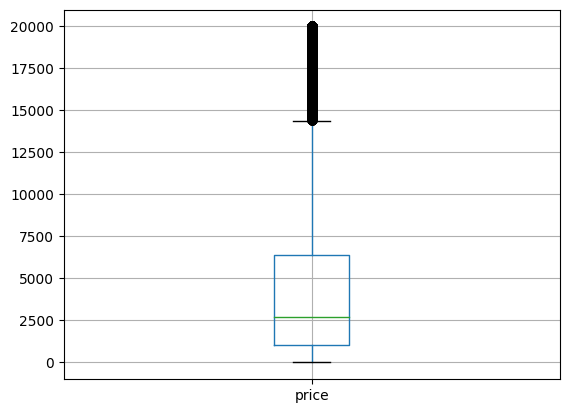

In [33]:
car_df.boxplot(column=['price'])
plt.show()

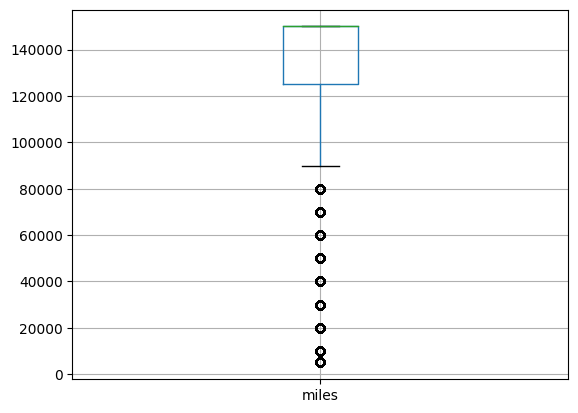

In [34]:
car_df.boxplot(column=['miles'])
plt.show()

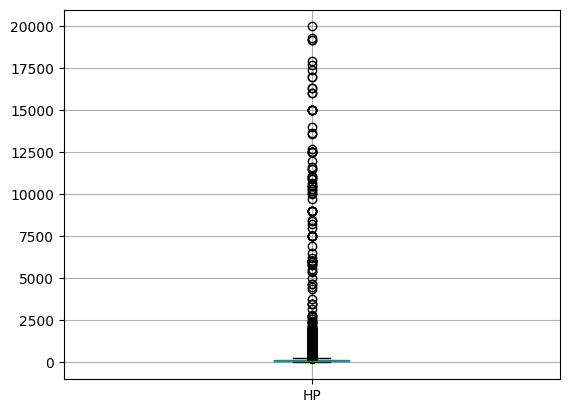

In [35]:
car_df.boxplot(column=['HP'])
plt.show()

HP will need to have some outliers removed.

In [36]:
values_count_HP = car_df['HP'].value_counts().sort_index()
print(values_count_HP.sample)

<bound method NDFrame.sample of 0        40098
1           34
2           10
3            8
4           30
         ...  
17932        1
19208        1
19211        1
19312        1
20000        1
Name: HP, Length: 711, dtype: int64>


In [37]:
car_df.HP.max()

20000

In [38]:
car_df.HP.min()

0

20,000 is the highest value for horsepower. Zero is the lowest horsepower in this dataset.

In reality, there are really no cars that have horsepower of 0, nor of 20,000. There are super high end cars that have horsepower as high as 1900, but none of those brands are in this dataset. I will drop rows that have horsepower higher than 1200.  I will not drop the rows that have a zero value,  I will assume that zero was intended to mean a missing value. 

In [39]:
hp_above_1200 = car_df.loc[car_df['HP'] > 1200]

count_hp_above_1200 = len(hp_above_1200)

print("Percentage of rows to be dropped: ")
print(count_hp_above_1200 / len(car_df))

Percentage of rows to be dropped: 
0.000705819908638671


I will be dropping 250 rows. This is far less than one percent of the total rows.

In [40]:
car_df = car_df[car_df['HP'] <= 1200]

In [41]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353948 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   price        353948 non-null  int64 
 1   type         353948 non-null  object
 2   regYear      353948 non-null  int64 
 3   trans        353948 non-null  object
 4   HP           353948 non-null  int64 
 5   model        353948 non-null  object
 6   miles        353948 non-null  int64 
 7   regMonth     353948 non-null  int64 
 8   fuel         353948 non-null  object
 9   brand        353948 non-null  object
 10  needsRepair  353948 non-null  object
dtypes: int64(5), object(6)
memory usage: 32.4+ MB


In [42]:
354369 - 353948

421

In total, 421 rows got dropped, from the original 354,369 rows.
Data is clean now.

<span style="color: #5A9BD5; font-size: 22px;">Ordinal Encoding:</span>

In [43]:
ordinal_encoder = OrdinalEncoder()

In [44]:
# List of columns to encode
columns_to_encode = ['type', 'trans', 'model', 'fuel', 'brand', 'needsRepair']

In [45]:
car_df[columns_to_encode] = ordinal_encoder.fit_transform(car_df[columns_to_encode])

In [46]:
display(car_df.tail(10))

,price,type,regYear,trans,HP,model,miles,regMonth,fuel,brand,needsRepair
354359,7900,4.0,2010,1.0,140,116.0,150000,7,2.0,38.0,0.0
354360,3999,7.0,2005,1.0,3,11.0,150000,5,2.0,2.0,0.0
354361,5250,4.0,2016,0.0,150,4.0,150000,12,6.0,0.0,0.0
354362,3200,4.0,2004,1.0,225,140.0,150000,5,6.0,30.0,1.0
354363,1150,0.0,2000,1.0,0,249.0,150000,3,6.0,24.0,0.0
354364,0,4.0,2005,1.0,0,78.0,150000,7,6.0,22.0,1.0
354365,2200,4.0,2005,1.0,0,116.0,20000,1,6.0,33.0,0.0
354366,1199,1.0,2000,0.0,101,106.0,125000,3,6.0,32.0,0.0
354367,9200,0.0,1996,1.0,102,224.0,150000,3,2.0,38.0,0.0
354368,3400,7.0,2002,1.0,100,116.0,150000,6,2.0,38.0,0.0


<b>Explanation of columns:</b>

<b>Features</b>
- `datecrawled` ... date profile was downloaded from the database <span style="color: red;">(this column has been removed)</span>
- `type` ... vehicle body type
- `regYear` ... vehicle registration year
- `trans` ... gearbox type (transmission)
- `HP` ... horsepower
- `model` ... vehicle model
- `miles` ... mileage (measured in km)
- `regMonth` ... vehicle registration month
- `fuel` ... fuel type
- `brand` ... vehicle brand
- `needsRepair` ... vehicle repaired or not
- `dateCreated` ... date of profile creation  <span style="color: red;">(this column has been removed)</span>
- `numPics` ... number of vehicle pictures <span style="color: red;">(this column has been removed, as all values were '0'.)</span>
- `zip` ... postal code of profile owner (user)  <span style="color: red;">(this column has been removed)</span>
- `lastSeen` ... date of the last activity of the user  <span style="color: red;">(this column has been removed)</span>
                       
<b>Target</b>
- `price` — price (Euro)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent preprocessing!
</div>

## Model training

<span style="color: #5A9BD5; font-size: 22px;">Split data:</span>

In [47]:
# Split the data into training and testing sets
index_train_valid, index_test = train_test_split(car_df.index, test_size=0.2, random_state=12345)
index_train, index_valid = train_test_split(index_train_valid, test_size=0.25, random_state=54321)

In [48]:
data_train = car_df.loc[index_train]
data_valid = car_df.loc[index_valid]
data_test = car_df.loc[index_test]

In [49]:
display(data_train)

,price,type,regYear,trans,HP,model,miles,regMonth,fuel,brand,needsRepair
94790,1900,1.0,2016,1.0,0,116.0,150000,0,6.0,38.0,0.0
230505,1200,5.0,2001,1.0,60,173.0,150000,5,6.0,38.0,0.0
83261,2190,4.0,2000,1.0,75,116.0,150000,11,6.0,38.0,0.0
165737,1600,4.0,2006,1.0,90,214.0,125000,7,6.0,9.0,0.0
105612,11000,4.0,2012,1.0,136,6.0,80000,8,6.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
267726,2999,0.0,2007,1.0,109,57.0,150000,5,2.0,5.0,0.0
269534,1000,4.0,2016,1.0,115,170.0,150000,5,6.0,38.0,0.0
177328,3200,5.0,2004,1.0,101,173.0,150000,6,2.0,38.0,0.0
265509,6450,6.0,2003,0.0,250,145.0,150000,10,2.0,20.0,0.0


In [50]:
display(data_valid)

,price,type,regYear,trans,HP,model,miles,regMonth,fuel,brand,needsRepair
196287,1400,4.0,2005,1.0,0,10.0,150000,0,2.0,25.0,1.0
110243,700,5.0,1997,1.0,75,166.0,150000,2,6.0,36.0,1.0
176411,6600,4.0,1996,1.0,193,11.0,150000,10,6.0,2.0,0.0
190886,3150,5.0,2003,1.0,101,173.0,150000,3,2.0,38.0,0.0
307382,3990,4.0,2002,0.0,170,59.0,150000,10,4.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8159,2300,1.0,2005,1.0,90,218.0,150000,4,6.0,24.0,0.0
278852,200,0.0,1997,1.0,90,166.0,150000,7,2.0,9.0,1.0
316754,750,4.0,1988,1.0,132,95.0,150000,6,6.0,20.0,0.0
30461,350,5.0,1997,0.0,75,116.0,150000,10,6.0,38.0,0.0


In [51]:
display(data_test)

,price,type,regYear,trans,HP,model,miles,regMonth,fuel,brand,needsRepair
178290,1100,4.0,2000,1.0,0,143.0,150000,10,6.0,38.0,0.0
318870,4900,5.0,2008,1.0,60,83.0,90000,7,4.0,24.0,0.0
120833,3600,4.0,2006,0.0,0,47.0,50000,7,2.0,20.0,0.0
292302,15990,7.0,2013,1.0,147,44.0,50000,9,6.0,36.0,0.0
175426,850,7.0,2000,1.0,0,95.0,150000,10,2.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
307889,900,7.0,1999,1.0,150,170.0,150000,0,6.0,38.0,0.0
333306,13999,7.0,2010,0.0,190,31.0,150000,4,2.0,1.0,0.0
28311,7200,7.0,2005,0.0,150,59.0,150000,1,2.0,20.0,0.0
109025,8000,4.0,2017,1.0,0,75.0,10000,0,6.0,27.0,0.0


<span style="color: #5A9BD5; font-size: 16px;">'split the features from the target'</span>

In [52]:
# Separate features and target for training data
features_train = data_train.drop(columns=['price'])
target_train = data_train['price']

# Separate features and target for validation data
features_valid = data_valid.drop(columns=['price'])
target_valid = data_valid['price']

# Separate features and target for test data
features_test = data_test.drop(columns=['price'])
target_test = data_test['price']

<span style="color: #5A9BD5; font-size: 22px;">Create / train / predict / score models:</span>

<span style="color: #5A9BD5; font-size: 16px;">Linear Regression:</span>

Linear Regression is not very good for hyperparameter tuning, but it is perfect for doing a sanity check of other methods. If gradient boosting performs worse than linear regression, something definitely went wrong. Let's see what RMSE score the linear regression model gets, and we'll compare this score to gradient boosting scores, later on. ...

In [53]:
%%time
print('\n')

lr = LinearRegression()
lr.fit(features_train, target_train)
pred_test = lr.predict(features_test)

#RMSE (root mean squared error)
rmse = mean_squared_error(target_test, pred_test, squared=False)

print("Linear Regression Root Mean Squared Error score:")
print(round(rmse, 5))

print('\n')



Linear Regression Root Mean Squared Error score:
3203.00033


CPU times: user 48.1 ms, sys: 38.9 ms, total: 87 ms
Wall time: 61.5 ms


<span style="color: #5A9BD5; font-size: 16px;">Decision Tree:</span>

In [54]:
%%time
print('\n')

tree_list = [1, 3, 5, 7, 9, 11, 13]

for t in tree_list:
    dt = DecisionTreeRegressor(max_depth=t, random_state=42)
    dt.fit(features_train, target_train)
    pred_test = dt.predict(features_test)
    
    #RMSE (root mean squared error)
    rmse = mean_squared_error(target_test, pred_test, squared=False)
    print(f'Depth {t}')
    print(f'RMSE: {rmse:.5f}')
    print('\n')
    
print('\n')



Depth 1
RMSE: 3788.65377


Depth 3
RMSE: 3035.97730


Depth 5
RMSE: 2567.47963


Depth 7
RMSE: 2308.48580


Depth 9
RMSE: 2170.06779


Depth 11
RMSE: 2089.12546


Depth 13
RMSE: 2070.54538




CPU times: user 1.99 s, sys: 0 ns, total: 1.99 s
Wall time: 2.07 s


<span style="color: #5A9BD5; font-size: 16px;">Random Forest:</span>

In [55]:
%%time
print('\n')

forest_list = [2, 4, 6, 8, 10, 12, 14]

# Iterate over each depth
best_mse = float('inf')
best_depth = None

for depth in forest_list:
    rf = RandomForestRegressor(max_depth=depth, n_estimators=100, random_state=42)
    rf.fit(features_train, target_train)
    pred_test = rf.predict(features_test)
    
    # Evaluate model
    mse = mean_squared_error(target_test, pred_test)
    
    #RMSE (root mean squared error)
    rmse = mse ** 0.5
    print(f'Max Depth: {depth}, MSE: {mse.round(5)}, RMSE: {rmse.round(5)}')
    
    
    # Check if this is the best depth, so far, and store it
    if mse < best_mse:
        best_mse = mse
        best_depth = depth
    
print('\n')
best_rmse = best_mse ** 0.5
print(f'Best Depth for Random Forest: {best_depth}, Best MSE: {best_mse.round(5)}, Best RMSE: {best_rmse.round(5)}')
print('\n')



Max Depth: 2, MSE: 10643163.10632, RMSE: 3262.38611
Max Depth: 4, MSE: 7018156.64572, RMSE: 2649.18037
Max Depth: 6, MSE: 5551638.26604, RMSE: 2356.19147
Max Depth: 8, MSE: 4657408.44493, RMSE: 2158.10297
Max Depth: 10, MSE: 4083324.88837, RMSE: 2020.72385
Max Depth: 12, MSE: 3652784.54402, RMSE: 1911.22593
Max Depth: 14, MSE: 3361774.85579, RMSE: 1833.51435


Best Depth for Random Forest: 14, Best MSE: 3361774.85579, Best RMSE: 1833.51435


CPU times: user 2min 24s, sys: 92.8 ms, total: 2min 24s
Wall time: 2min 25s


<span style="color: #5A9BD5; font-size: 16px;">LGBM Regressor:</span>

In [56]:
%%time
print('\n')

# Separate features and target for training, validation, and test data
features_train = data_train.drop(columns=['price'])
target_train = data_train['price']
features_valid = data_valid.drop(columns=['price'])

target_valid = data_valid['price']
features_test = data_test.drop(columns=['price'])
target_test = data_test['price']

# Combine train and validation data for Cross-validation (K-Fold)
data_train_valid = pd.concat([data_train, data_valid])

features = data_train_valid.drop(columns=['price']).values
target = data_train_valid['price'].values


kf = KFold(n_splits=5)
rmses = []

for train_index, valid_index in kf.split(features):
    X_train, X_valid = features[train_index], features[valid_index]
    y_train, y_valid = target[train_index], target[valid_index]
    

    lgb = LGBMRegressor(
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=100,
        max_depth=5,
        random_state=42
    )
    
    lgb.fit(X_train, y_train)
    
    # Predict on the validation data
    pred_valid = lgb.predict(X_valid)
    
    mse = mean_squared_error(y_valid, pred_valid)
    
    #RMSE (root mean squared error)
    rmse = np.sqrt(mse)
    rmses.append(rmse)
    
average_rmse = np.mean(rmses)
print("Average RMSE:", average_rmse)

print('\n')



Average RMSE: 2005.5916079760002


CPU times: user 1min 6s, sys: 89 ms, total: 1min 7s
Wall time: 1min 7s


<span style="color: #5A9BD5; font-size: 16px;">Cat Boost Regressor:</span>

In [58]:
%%time
print('\n')

# Define the parameter grid
param_grid = {
    'depth': [4, 6, 8],  # This is an example range of depths to test
    'iterations': [200],
    'learning_rate': [0.01],
    'l2_leaf_reg': [3],
    'loss_function': ['RMSE']
}

# Initialize the CatBoost Regressor
catboost_model = CatBoostRegressor()

# Initialize GridSearchCV with the defined parameter grid
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(features_train, target_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_depth = best_params['depth']

# Print out the best depth found by GridSearchCV
print(f"Best depth: {best_depth}")

# Train a CatBoostRegressor with the best parameters
catboost_model = CatBoostRegressor(**best_params)
catboost_model.fit(features_train, target_train)

# Make predictions on the test data
cat_predictions = catboost_model.predict(features_test)

# Calculate RMSE (root mean squared error) of the predictions
rmse = np.sqrt(mean_squared_error(target_test, cat_predictions))
print(f"RMSE: {rmse}")

# Update and print the best RMSE
best_rmse = float('inf')
if rmse < best_rmse:
    best_rmse = rmse
    
# Print out the best depth found by GridSearchCV
print('\n')
print(f"Best depth: {best_depth}")

print('\n')
print(f"Best RMSE: {best_rmse}")

print('\n')



0:	learn: 4491.5870034	total: 15.7ms	remaining: 3.13s
1:	learn: 4466.1666857	total: 32.4ms	remaining: 3.21s
2:	learn: 4441.8428358	total: 49.5ms	remaining: 3.25s
3:	learn: 4417.4301741	total: 65.1ms	remaining: 3.19s
4:	learn: 4393.9255948	total: 80.2ms	remaining: 3.13s
5:	learn: 4370.4842166	total: 95.7ms	remaining: 3.09s
6:	learn: 4346.6068852	total: 111ms	remaining: 3.06s
7:	learn: 4323.7046798	total: 128ms	remaining: 3.06s
8:	learn: 4300.3328537	total: 145ms	remaining: 3.08s
9:	learn: 4277.2584643	total: 161ms	remaining: 3.06s
10:	learn: 4255.2375430	total: 177ms	remaining: 3.04s
11:	learn: 4232.8732536	total: 192ms	remaining: 3.01s
12:	learn: 4210.6449945	total: 207ms	remaining: 2.98s
13:	learn: 4188.7352792	total: 224ms	remaining: 2.98s
14:	learn: 4167.8390169	total: 242ms	remaining: 2.99s
15:	learn: 4147.2435795	total: 259ms	remaining: 2.98s
16:	learn: 4126.9131651	total: 274ms	remaining: 2.95s
17:	learn: 4106.1878321	total: 290ms	remaining: 2.93s
18:	learn: 4085.8895643	total:

157:	learn: 2722.5310511	total: 2.58s	remaining: 685ms
158:	learn: 2718.8295581	total: 2.59s	remaining: 668ms
159:	learn: 2714.5649905	total: 2.61s	remaining: 652ms
160:	learn: 2710.8021377	total: 2.63s	remaining: 637ms
161:	learn: 2707.2111303	total: 2.64s	remaining: 620ms
162:	learn: 2702.9671805	total: 2.66s	remaining: 603ms
163:	learn: 2698.8336285	total: 2.67s	remaining: 587ms
164:	learn: 2694.7435337	total: 2.69s	remaining: 570ms
165:	learn: 2690.7969305	total: 2.7s	remaining: 553ms
166:	learn: 2687.3156096	total: 2.72s	remaining: 537ms
167:	learn: 2683.3866499	total: 2.73s	remaining: 521ms
168:	learn: 2679.4980736	total: 2.75s	remaining: 504ms
169:	learn: 2676.1424846	total: 2.76s	remaining: 488ms
170:	learn: 2672.4055434	total: 2.78s	remaining: 471ms
171:	learn: 2669.1715356	total: 2.79s	remaining: 455ms
172:	learn: 2665.4118317	total: 2.81s	remaining: 438ms
173:	learn: 2662.2019970	total: 2.83s	remaining: 422ms
174:	learn: 2658.5876385	total: 2.84s	remaining: 406ms
175:	learn:

115:	learn: 2931.8999903	total: 1.92s	remaining: 1.39s
116:	learn: 2926.0477169	total: 1.94s	remaining: 1.37s
117:	learn: 2920.2923712	total: 1.96s	remaining: 1.36s
118:	learn: 2914.5991709	total: 1.97s	remaining: 1.34s
119:	learn: 2907.8107286	total: 1.99s	remaining: 1.33s
120:	learn: 2901.6460644	total: 2.01s	remaining: 1.31s
121:	learn: 2896.0313893	total: 2.02s	remaining: 1.29s
122:	learn: 2890.5578166	total: 2.04s	remaining: 1.27s
123:	learn: 2884.0866301	total: 2.05s	remaining: 1.26s
124:	learn: 2878.2631881	total: 2.07s	remaining: 1.24s
125:	learn: 2873.0355167	total: 2.08s	remaining: 1.22s
126:	learn: 2867.7719185	total: 2.1s	remaining: 1.21s
127:	learn: 2862.6390637	total: 2.12s	remaining: 1.19s
128:	learn: 2857.2181932	total: 2.13s	remaining: 1.17s
129:	learn: 2852.1261814	total: 2.15s	remaining: 1.16s
130:	learn: 2846.3712937	total: 2.17s	remaining: 1.14s
131:	learn: 2841.5139208	total: 2.18s	remaining: 1.13s
132:	learn: 2835.8774806	total: 2.2s	remaining: 1.11s
133:	learn: 

77:	learn: 3227.9054697	total: 1.26s	remaining: 1.98s
78:	learn: 3218.2358766	total: 1.28s	remaining: 1.96s
79:	learn: 3209.1635138	total: 1.29s	remaining: 1.94s
80:	learn: 3199.9482338	total: 1.31s	remaining: 1.93s
81:	learn: 3189.8726609	total: 1.33s	remaining: 1.91s
82:	learn: 3180.1430212	total: 1.35s	remaining: 1.9s
83:	learn: 3171.1765155	total: 1.36s	remaining: 1.88s
84:	learn: 3161.5248564	total: 1.38s	remaining: 1.86s
85:	learn: 3152.8496201	total: 1.39s	remaining: 1.85s
86:	learn: 3143.3569593	total: 1.41s	remaining: 1.83s
87:	learn: 3134.0741564	total: 1.43s	remaining: 1.82s
88:	learn: 3125.6018158	total: 1.44s	remaining: 1.8s
89:	learn: 3116.5700875	total: 1.46s	remaining: 1.78s
90:	learn: 3108.3640205	total: 1.48s	remaining: 1.77s
91:	learn: 3099.7440272	total: 1.49s	remaining: 1.75s
92:	learn: 3091.7071610	total: 1.51s	remaining: 1.74s
93:	learn: 3083.4051124	total: 1.53s	remaining: 1.73s
94:	learn: 3075.5948852	total: 1.55s	remaining: 1.71s
95:	learn: 3067.0314346	total:

38:	learn: 3723.6168467	total: 639ms	remaining: 2.64s
39:	learn: 3708.3272176	total: 655ms	remaining: 2.62s
40:	learn: 3692.6813247	total: 672ms	remaining: 2.61s
41:	learn: 3677.2769607	total: 689ms	remaining: 2.59s
42:	learn: 3662.0079618	total: 704ms	remaining: 2.57s
43:	learn: 3647.0003321	total: 720ms	remaining: 2.55s
44:	learn: 3632.2740121	total: 735ms	remaining: 2.53s
45:	learn: 3617.1147512	total: 750ms	remaining: 2.51s
46:	learn: 3603.1965814	total: 767ms	remaining: 2.5s
47:	learn: 3588.1410896	total: 784ms	remaining: 2.48s
48:	learn: 3574.1497851	total: 800ms	remaining: 2.46s
49:	learn: 3559.8483739	total: 816ms	remaining: 2.45s
50:	learn: 3546.2788183	total: 831ms	remaining: 2.43s
51:	learn: 3532.6069445	total: 852ms	remaining: 2.42s
52:	learn: 3519.1689679	total: 869ms	remaining: 2.41s
53:	learn: 3505.9818648	total: 886ms	remaining: 2.39s
54:	learn: 3492.2709755	total: 901ms	remaining: 2.37s
55:	learn: 3478.9116299	total: 916ms	remaining: 2.35s
56:	learn: 3466.0364882	total

194:	learn: 2592.2942465	total: 3.15s	remaining: 80.7ms
195:	learn: 2589.2551888	total: 3.17s	remaining: 64.6ms
196:	learn: 2586.5607724	total: 3.18s	remaining: 48.5ms
197:	learn: 2583.4915354	total: 3.2s	remaining: 32.3ms
198:	learn: 2580.9555437	total: 3.21s	remaining: 16.1ms
199:	learn: 2578.0425287	total: 3.23s	remaining: 0us
0:	learn: 4490.7287748	total: 16.1ms	remaining: 3.21s
1:	learn: 4465.4318394	total: 33.3ms	remaining: 3.29s
2:	learn: 4441.2102487	total: 50.5ms	remaining: 3.32s
3:	learn: 4416.6744487	total: 66ms	remaining: 3.23s
4:	learn: 4392.9548267	total: 81.3ms	remaining: 3.17s
5:	learn: 4369.5852697	total: 96.7ms	remaining: 3.13s
6:	learn: 4345.8269256	total: 113ms	remaining: 3.1s
7:	learn: 4322.2876159	total: 130ms	remaining: 3.11s
8:	learn: 4299.1027655	total: 146ms	remaining: 3.1s
9:	learn: 4276.8777644	total: 162ms	remaining: 3.08s
10:	learn: 4254.7825084	total: 178ms	remaining: 3.05s
11:	learn: 4233.2037424	total: 193ms	remaining: 3.02s
12:	learn: 4211.1012860	tota

156:	learn: 2729.5398168	total: 2.52s	remaining: 691ms
157:	learn: 2725.4212324	total: 2.54s	remaining: 676ms
158:	learn: 2721.1618129	total: 2.56s	remaining: 660ms
159:	learn: 2716.8825996	total: 2.58s	remaining: 644ms
160:	learn: 2713.1678224	total: 2.59s	remaining: 628ms
161:	learn: 2709.0289908	total: 2.61s	remaining: 612ms
162:	learn: 2705.4887025	total: 2.63s	remaining: 596ms
163:	learn: 2701.4440024	total: 2.64s	remaining: 580ms
164:	learn: 2697.8269605	total: 2.66s	remaining: 564ms
165:	learn: 2694.3170995	total: 2.67s	remaining: 548ms
166:	learn: 2690.8905323	total: 2.69s	remaining: 531ms
167:	learn: 2686.9756044	total: 2.71s	remaining: 515ms
168:	learn: 2683.1221278	total: 2.72s	remaining: 499ms
169:	learn: 2679.3575633	total: 2.74s	remaining: 483ms
170:	learn: 2676.0793668	total: 2.75s	remaining: 467ms
171:	learn: 2672.8467868	total: 2.77s	remaining: 450ms
172:	learn: 2669.5470344	total: 2.78s	remaining: 434ms
173:	learn: 2665.9753186	total: 2.8s	remaining: 418ms
174:	learn:

110:	learn: 2814.8899623	total: 2.15s	remaining: 1.73s
111:	learn: 2808.0325687	total: 2.17s	remaining: 1.71s
112:	learn: 2800.8949598	total: 2.19s	remaining: 1.69s
113:	learn: 2793.9801583	total: 2.21s	remaining: 1.67s
114:	learn: 2786.9430547	total: 2.23s	remaining: 1.65s
115:	learn: 2780.1914540	total: 2.25s	remaining: 1.63s
116:	learn: 2773.5003415	total: 2.27s	remaining: 1.61s
117:	learn: 2766.7267872	total: 2.29s	remaining: 1.59s
118:	learn: 2760.0853769	total: 2.31s	remaining: 1.57s
119:	learn: 2753.6562162	total: 2.33s	remaining: 1.55s
120:	learn: 2747.5190018	total: 2.35s	remaining: 1.53s
121:	learn: 2741.5227944	total: 2.36s	remaining: 1.51s
122:	learn: 2735.2220837	total: 2.38s	remaining: 1.49s
123:	learn: 2729.3006590	total: 2.4s	remaining: 1.47s
124:	learn: 2723.2859516	total: 2.42s	remaining: 1.46s
125:	learn: 2717.0783638	total: 2.44s	remaining: 1.43s
126:	learn: 2711.4784206	total: 2.46s	remaining: 1.42s
127:	learn: 2705.3624117	total: 2.48s	remaining: 1.4s
128:	learn: 

65:	learn: 3243.9410474	total: 1.29s	remaining: 2.62s
66:	learn: 3231.4039236	total: 1.31s	remaining: 2.6s
67:	learn: 3219.7132731	total: 1.32s	remaining: 2.57s
68:	learn: 3207.4906806	total: 1.34s	remaining: 2.55s
69:	learn: 3195.7139790	total: 1.36s	remaining: 2.53s
70:	learn: 3184.5409887	total: 1.38s	remaining: 2.51s
71:	learn: 3172.4588663	total: 1.4s	remaining: 2.49s
72:	learn: 3161.0363463	total: 1.42s	remaining: 2.47s
73:	learn: 3149.7689963	total: 1.44s	remaining: 2.45s
74:	learn: 3138.2340659	total: 1.46s	remaining: 2.43s
75:	learn: 3127.4432973	total: 1.48s	remaining: 2.41s
76:	learn: 3116.4734373	total: 1.5s	remaining: 2.39s
77:	learn: 3105.2334120	total: 1.52s	remaining: 2.37s
78:	learn: 3094.8480815	total: 1.53s	remaining: 2.35s
79:	learn: 3084.4273530	total: 1.56s	remaining: 2.34s
80:	learn: 3074.3848655	total: 1.58s	remaining: 2.32s
81:	learn: 3064.3454512	total: 1.6s	remaining: 2.3s
82:	learn: 3054.4465028	total: 1.61s	remaining: 2.28s
83:	learn: 3044.7227791	total: 1.

22:	learn: 3949.3349010	total: 442ms	remaining: 3.4s
23:	learn: 3928.2097865	total: 460ms	remaining: 3.37s
24:	learn: 3907.5557896	total: 478ms	remaining: 3.35s
25:	learn: 3887.2621323	total: 496ms	remaining: 3.32s
26:	learn: 3867.4538468	total: 521ms	remaining: 3.34s
27:	learn: 3847.6312356	total: 541ms	remaining: 3.32s
28:	learn: 3827.0459720	total: 559ms	remaining: 3.3s
29:	learn: 3807.9715958	total: 577ms	remaining: 3.27s
30:	learn: 3788.4494047	total: 595ms	remaining: 3.25s
31:	learn: 3769.2231224	total: 619ms	remaining: 3.25s
32:	learn: 3751.1566319	total: 640ms	remaining: 3.24s
33:	learn: 3732.5187860	total: 659ms	remaining: 3.22s
34:	learn: 3713.7080163	total: 677ms	remaining: 3.19s
35:	learn: 3695.2863721	total: 696ms	remaining: 3.17s
36:	learn: 3677.9477158	total: 716ms	remaining: 3.15s
37:	learn: 3659.9080880	total: 737ms	remaining: 3.14s
38:	learn: 3642.2079431	total: 755ms	remaining: 3.12s
39:	learn: 3624.8957655	total: 773ms	remaining: 3.09s
40:	learn: 3607.9243290	total:

175:	learn: 2491.0192624	total: 3.39s	remaining: 462ms
176:	learn: 2487.6002060	total: 3.41s	remaining: 443ms
177:	learn: 2484.3129754	total: 3.43s	remaining: 423ms
178:	learn: 2480.9434263	total: 3.44s	remaining: 404ms
179:	learn: 2477.7518259	total: 3.46s	remaining: 385ms
180:	learn: 2474.5585742	total: 3.48s	remaining: 365ms
181:	learn: 2471.5218831	total: 3.5s	remaining: 346ms
182:	learn: 2468.5558024	total: 3.52s	remaining: 327ms
183:	learn: 2465.2507487	total: 3.53s	remaining: 307ms
184:	learn: 2462.3764236	total: 3.55s	remaining: 288ms
185:	learn: 2459.2101024	total: 3.57s	remaining: 269ms
186:	learn: 2456.1312349	total: 3.58s	remaining: 249ms
187:	learn: 2453.2663449	total: 3.6s	remaining: 230ms
188:	learn: 2450.3967190	total: 3.62s	remaining: 211ms
189:	learn: 2447.4132239	total: 3.64s	remaining: 192ms
190:	learn: 2444.5718348	total: 3.66s	remaining: 172ms
191:	learn: 2441.6739301	total: 3.68s	remaining: 153ms
192:	learn: 2438.9059122	total: 3.7s	remaining: 134ms
193:	learn: 2

132:	learn: 2677.0108863	total: 2.57s	remaining: 1.29s
133:	learn: 2671.8310166	total: 2.59s	remaining: 1.28s
134:	learn: 2666.6187712	total: 2.61s	remaining: 1.26s
135:	learn: 2661.2941621	total: 2.63s	remaining: 1.24s
136:	learn: 2656.1806555	total: 2.65s	remaining: 1.22s
137:	learn: 2651.0666679	total: 2.66s	remaining: 1.2s
138:	learn: 2646.1579848	total: 2.69s	remaining: 1.18s
139:	learn: 2641.2576113	total: 2.71s	remaining: 1.16s
140:	learn: 2636.5225051	total: 2.73s	remaining: 1.14s
141:	learn: 2631.4971230	total: 2.75s	remaining: 1.12s
142:	learn: 2626.7643234	total: 2.76s	remaining: 1.1s
143:	learn: 2621.9897740	total: 2.78s	remaining: 1.08s
144:	learn: 2617.4257898	total: 2.8s	remaining: 1.06s
145:	learn: 2612.9418932	total: 2.82s	remaining: 1.04s
146:	learn: 2608.2422200	total: 2.84s	remaining: 1.02s
147:	learn: 2603.5499900	total: 2.85s	remaining: 1s
148:	learn: 2598.6845968	total: 2.88s	remaining: 984ms
149:	learn: 2594.3907481	total: 2.89s	remaining: 965ms
150:	learn: 2590

87:	learn: 3009.8112055	total: 1.71s	remaining: 2.18s
88:	learn: 3000.1319872	total: 1.73s	remaining: 2.16s
89:	learn: 2990.7863816	total: 1.75s	remaining: 2.14s
90:	learn: 2981.5544709	total: 1.77s	remaining: 2.12s
91:	learn: 2972.6258529	total: 1.79s	remaining: 2.1s
92:	learn: 2963.9980829	total: 1.81s	remaining: 2.08s
93:	learn: 2954.8841879	total: 1.83s	remaining: 2.06s
94:	learn: 2946.4112557	total: 1.85s	remaining: 2.04s
95:	learn: 2937.5764604	total: 1.87s	remaining: 2.02s
96:	learn: 2929.2539109	total: 1.89s	remaining: 2s
97:	learn: 2920.7942381	total: 1.9s	remaining: 1.98s
98:	learn: 2912.7584108	total: 1.92s	remaining: 1.96s
99:	learn: 2904.6829939	total: 1.94s	remaining: 1.94s
100:	learn: 2896.9970658	total: 1.96s	remaining: 1.92s
101:	learn: 2888.6999834	total: 1.98s	remaining: 1.9s
102:	learn: 2880.6353825	total: 2s	remaining: 1.88s
103:	learn: 2872.6663392	total: 2.02s	remaining: 1.86s
104:	learn: 2864.8165227	total: 2.04s	remaining: 1.85s
105:	learn: 2857.4432604	total: 

44:	learn: 3481.9361852	total: 1.31s	remaining: 4.52s
45:	learn: 3465.0180902	total: 1.33s	remaining: 4.47s
46:	learn: 3448.2757345	total: 1.36s	remaining: 4.42s
47:	learn: 3431.9180229	total: 1.38s	remaining: 4.38s
48:	learn: 3415.4844558	total: 1.41s	remaining: 4.34s
49:	learn: 3399.1288772	total: 1.43s	remaining: 4.29s
50:	learn: 3383.1057887	total: 1.45s	remaining: 4.24s
51:	learn: 3367.0524447	total: 1.47s	remaining: 4.19s
52:	learn: 3351.5742319	total: 1.5s	remaining: 4.16s
53:	learn: 3336.3024067	total: 1.52s	remaining: 4.12s
54:	learn: 3320.6473067	total: 1.54s	remaining: 4.07s
55:	learn: 3305.7622998	total: 1.57s	remaining: 4.03s
56:	learn: 3291.1214237	total: 1.59s	remaining: 3.99s
57:	learn: 3276.0533079	total: 1.61s	remaining: 3.95s
58:	learn: 3261.6325605	total: 1.64s	remaining: 3.92s
59:	learn: 3247.5275304	total: 1.66s	remaining: 3.88s
60:	learn: 3233.3724265	total: 1.68s	remaining: 3.84s
61:	learn: 3219.3236681	total: 1.71s	remaining: 3.81s
62:	learn: 3205.2062474	total

197:	learn: 2326.0451333	total: 4.83s	remaining: 48.8ms
198:	learn: 2323.4602481	total: 4.85s	remaining: 24.4ms
199:	learn: 2321.0301185	total: 4.88s	remaining: 0us
0:	learn: 4492.5451797	total: 34.2ms	remaining: 6.81s
1:	learn: 4463.0327153	total: 57.9ms	remaining: 5.73s
2:	learn: 4433.5140792	total: 80.1ms	remaining: 5.26s
3:	learn: 4404.6376361	total: 104ms	remaining: 5.09s
4:	learn: 4375.7914662	total: 128ms	remaining: 5.01s
5:	learn: 4347.4709372	total: 151ms	remaining: 4.87s
6:	learn: 4319.9284130	total: 172ms	remaining: 4.75s
7:	learn: 4292.3078069	total: 194ms	remaining: 4.66s
8:	learn: 4265.2053051	total: 220ms	remaining: 4.67s
9:	learn: 4239.0460258	total: 243ms	remaining: 4.61s
10:	learn: 4213.1949725	total: 265ms	remaining: 4.55s
11:	learn: 4187.3864132	total: 288ms	remaining: 4.51s
12:	learn: 4161.7479111	total: 316ms	remaining: 4.54s
13:	learn: 4135.9375919	total: 339ms	remaining: 4.51s
14:	learn: 4110.6602860	total: 361ms	remaining: 4.46s
15:	learn: 4085.6122608	total: 3

155:	learn: 2469.2258324	total: 3.64s	remaining: 1.02s
156:	learn: 2465.0839998	total: 3.66s	remaining: 1s
157:	learn: 2460.9707565	total: 3.68s	remaining: 978ms
158:	learn: 2456.8262261	total: 3.7s	remaining: 955ms
159:	learn: 2452.5520064	total: 3.73s	remaining: 932ms
160:	learn: 2448.2243998	total: 3.75s	remaining: 908ms
161:	learn: 2444.3078504	total: 3.77s	remaining: 884ms
162:	learn: 2440.1567824	total: 3.79s	remaining: 861ms
163:	learn: 2436.3203685	total: 3.82s	remaining: 838ms
164:	learn: 2432.5825612	total: 3.84s	remaining: 816ms
165:	learn: 2428.9150675	total: 3.87s	remaining: 792ms
166:	learn: 2425.0912123	total: 3.9s	remaining: 770ms
167:	learn: 2421.4615850	total: 3.92s	remaining: 746ms
168:	learn: 2417.6280183	total: 3.94s	remaining: 722ms
169:	learn: 2414.0162006	total: 3.96s	remaining: 699ms
170:	learn: 2410.5248159	total: 3.98s	remaining: 675ms
171:	learn: 2406.9207823	total: 4s	remaining: 652ms
172:	learn: 2403.2475595	total: 4.03s	remaining: 628ms
173:	learn: 2399.8

112:	learn: 2704.1092498	total: 2.79s	remaining: 2.15s
113:	learn: 2697.1210127	total: 2.82s	remaining: 2.13s
114:	learn: 2689.9727975	total: 2.85s	remaining: 2.1s
115:	learn: 2683.0524396	total: 2.87s	remaining: 2.08s
116:	learn: 2675.9903814	total: 2.9s	remaining: 2.06s
117:	learn: 2669.4028514	total: 2.94s	remaining: 2.04s
118:	learn: 2662.5487533	total: 2.96s	remaining: 2.02s
119:	learn: 2655.8970479	total: 2.99s	remaining: 1.99s
120:	learn: 2649.1125450	total: 3.01s	remaining: 1.97s
121:	learn: 2642.8227350	total: 3.04s	remaining: 1.94s
122:	learn: 2636.6907303	total: 3.06s	remaining: 1.92s
123:	learn: 2630.5397234	total: 3.09s	remaining: 1.89s
124:	learn: 2624.4009293	total: 3.11s	remaining: 1.87s
125:	learn: 2618.1991359	total: 3.13s	remaining: 1.84s
126:	learn: 2611.9962040	total: 3.15s	remaining: 1.81s
127:	learn: 2606.2043376	total: 3.18s	remaining: 1.79s
128:	learn: 2600.2618637	total: 3.2s	remaining: 1.76s
129:	learn: 2594.4320356	total: 3.22s	remaining: 1.74s
130:	learn: 2

71:	learn: 3089.7840324	total: 1.7s	remaining: 3.03s
72:	learn: 3077.6528223	total: 1.73s	remaining: 3s
73:	learn: 3065.6178617	total: 1.76s	remaining: 2.99s
74:	learn: 3053.9554013	total: 1.78s	remaining: 2.97s
75:	learn: 3042.2875918	total: 1.8s	remaining: 2.94s
76:	learn: 3030.9878288	total: 1.83s	remaining: 2.92s
77:	learn: 3019.5445975	total: 1.85s	remaining: 2.89s
78:	learn: 3008.5256976	total: 1.87s	remaining: 2.87s
79:	learn: 2998.0106845	total: 1.89s	remaining: 2.84s
80:	learn: 2986.9106823	total: 1.92s	remaining: 2.82s
81:	learn: 2976.3089735	total: 1.94s	remaining: 2.79s
82:	learn: 2965.9562570	total: 1.96s	remaining: 2.77s
83:	learn: 2955.8175799	total: 1.99s	remaining: 2.74s
84:	learn: 2945.3605223	total: 2.01s	remaining: 2.71s
85:	learn: 2935.3861914	total: 2.03s	remaining: 2.69s
86:	learn: 2925.8441313	total: 2.05s	remaining: 2.67s
87:	learn: 2915.5252801	total: 2.08s	remaining: 2.64s
88:	learn: 2905.7786508	total: 2.1s	remaining: 2.62s
89:	learn: 2895.8084720	total: 2.1

27:	learn: 3806.9991770	total: 644ms	remaining: 3.95s
28:	learn: 3786.1014877	total: 665ms	remaining: 3.92s
29:	learn: 3765.0254063	total: 696ms	remaining: 3.94s
30:	learn: 3744.1092378	total: 721ms	remaining: 3.93s
31:	learn: 3723.8728754	total: 742ms	remaining: 3.9s
32:	learn: 3704.0473478	total: 765ms	remaining: 3.87s
33:	learn: 3684.5404838	total: 787ms	remaining: 3.84s
34:	learn: 3665.2413798	total: 811ms	remaining: 3.83s
35:	learn: 3645.7172561	total: 837ms	remaining: 3.81s
36:	learn: 3626.6290124	total: 860ms	remaining: 3.79s
37:	learn: 3607.9696015	total: 883ms	remaining: 3.76s
38:	learn: 3589.5114289	total: 907ms	remaining: 3.75s
39:	learn: 3571.3734362	total: 932ms	remaining: 3.73s
40:	learn: 3553.4245077	total: 954ms	remaining: 3.7s
41:	learn: 3535.3069141	total: 976ms	remaining: 3.67s
42:	learn: 3517.9882622	total: 1s	remaining: 3.65s
43:	learn: 3500.4073928	total: 1.02s	remaining: 3.63s
44:	learn: 3482.9928036	total: 1.05s	remaining: 3.6s
45:	learn: 3465.9251618	total: 1.0

180:	learn: 2382.2086061	total: 4.17s	remaining: 438ms
181:	learn: 2379.2379576	total: 4.2s	remaining: 415ms
182:	learn: 2376.2374239	total: 4.22s	remaining: 392ms
183:	learn: 2373.0767706	total: 4.24s	remaining: 369ms
184:	learn: 2370.1399278	total: 4.26s	remaining: 346ms
185:	learn: 2366.9460780	total: 4.29s	remaining: 323ms
186:	learn: 2364.0570689	total: 4.31s	remaining: 300ms
187:	learn: 2360.9112571	total: 4.33s	remaining: 277ms
188:	learn: 2358.1040758	total: 4.35s	remaining: 253ms
189:	learn: 2355.3037860	total: 4.37s	remaining: 230ms
190:	learn: 2352.3330267	total: 4.4s	remaining: 207ms
191:	learn: 2349.5169377	total: 4.42s	remaining: 184ms
192:	learn: 2346.3888516	total: 4.44s	remaining: 161ms
193:	learn: 2343.5973589	total: 4.46s	remaining: 138ms
194:	learn: 2340.9032627	total: 4.49s	remaining: 115ms
195:	learn: 2338.2906387	total: 4.51s	remaining: 92.1ms
196:	learn: 2335.5166185	total: 4.54s	remaining: 69.1ms
197:	learn: 2332.9496942	total: 4.55s	remaining: 46ms
198:	learn:

134:	learn: 2570.4786942	total: 3.89s	remaining: 1.87s
135:	learn: 2565.0787034	total: 3.92s	remaining: 1.84s
136:	learn: 2559.7406345	total: 3.95s	remaining: 1.81s
137:	learn: 2554.3205718	total: 3.98s	remaining: 1.79s
138:	learn: 2549.4678787	total: 4s	remaining: 1.75s
139:	learn: 2544.1750982	total: 4.03s	remaining: 1.73s
140:	learn: 2539.0762924	total: 4.06s	remaining: 1.7s
141:	learn: 2534.1639910	total: 4.08s	remaining: 1.67s
142:	learn: 2529.0991355	total: 4.11s	remaining: 1.64s
143:	learn: 2524.2275486	total: 4.14s	remaining: 1.61s
144:	learn: 2519.4166127	total: 4.17s	remaining: 1.58s
145:	learn: 2514.6220983	total: 4.19s	remaining: 1.55s
146:	learn: 2509.9763480	total: 4.22s	remaining: 1.52s
147:	learn: 2505.2841421	total: 4.26s	remaining: 1.5s
148:	learn: 2500.7562543	total: 4.29s	remaining: 1.47s
149:	learn: 2496.2547170	total: 4.32s	remaining: 1.44s
150:	learn: 2491.8753291	total: 4.34s	remaining: 1.41s
151:	learn: 2487.5711962	total: 4.37s	remaining: 1.38s
152:	learn: 248

86:	learn: 2928.7772657	total: 2.53s	remaining: 3.28s
87:	learn: 2919.0880078	total: 2.55s	remaining: 3.25s
88:	learn: 2909.4474160	total: 2.58s	remaining: 3.22s
89:	learn: 2899.6577782	total: 2.61s	remaining: 3.19s
90:	learn: 2890.3399979	total: 2.64s	remaining: 3.16s
91:	learn: 2880.9677692	total: 2.67s	remaining: 3.13s
92:	learn: 2871.8911718	total: 2.7s	remaining: 3.1s
93:	learn: 2862.7557720	total: 2.73s	remaining: 3.07s
94:	learn: 2853.9257952	total: 2.75s	remaining: 3.04s
95:	learn: 2845.1111450	total: 2.78s	remaining: 3.01s
96:	learn: 2836.5092397	total: 2.81s	remaining: 2.98s
97:	learn: 2827.7311801	total: 2.84s	remaining: 2.95s
98:	learn: 2818.9296947	total: 2.86s	remaining: 2.92s
99:	learn: 2810.8151932	total: 2.89s	remaining: 2.89s
100:	learn: 2802.4543366	total: 2.92s	remaining: 2.86s
101:	learn: 2793.6590680	total: 2.95s	remaining: 2.83s
102:	learn: 2785.8047316	total: 2.98s	remaining: 2.81s
103:	learn: 2777.7760178	total: 3.01s	remaining: 2.77s
104:	learn: 2769.8476208	t

<span style="color: #5A9BD5; font-size: 16px;">XGB Regressor:</span>

In [62]:
%%time
print('\n')
xgb_model = XGBRegressor()
xgb_model.fit(features_train, target_train)
xgb_predictions = xgb_model.predict(features_test)

#RMSE (root mean squared error)
rmse = np.sqrt(mean_squared_error(target_test, xgb_predictions))
print(f"RMSE for XGBoost: {rmse}")

print('\n')



RMSE for XGBoost: 1787.8948759871791


CPU times: user 1min 5s, sys: 64.4 ms, total: 1min 5s
Wall time: 1min 5s


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

## Model analysis

Root Mean Squared Error (RMSE) is a commonly used metric to evaluate the performance of regression models. It measures the average magnitude of the errors between predicted and actual values, with a lower RMSE indicating better model performance.
<br>
<br>
Linear Regression <b>RMSE score : 3203</b>
<br>
Decision Tree <b>RMSE score : 2070.54538</b>, Best Depth : 13
<br>
<br>

Random Forest Regressor <b>best RMSE score : 1833.51435</b>, Best Depth : 14
<br>
LGBM Average <b>RMSE: 2005.5916079760002</b>
<br>
<br>
    
Cat Boost Regressor : <b>Best RMSE: 2311.832039802625</b>, Best depth: 8
<br>
XGBoost <b>RMSE : 1787.8948759871791</b>
    
<br>
<br>
Better Performing Models: Among the models, XGBoost has the lowest RMSE of 1787.89, indicating that it is the best performing model on this dataset in terms of prediction accuracy. This is followed by Random Forest with an RMSE of 1833.51.
<br>
<br>
Tree-Based Models Perform Better: Decision Tree, Random Forest, XGBoost, and LGBM, which are all tree-based models, significantly outperform Linear Regression. This suggests that the relationship between the features and the target variable may not be linear, and tree-based methods are capturing this complex structure more effectively.
<br>
<br>
Overall, XGBoost and Random Forest are the most promising models.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great final conclusion!
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed